In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="72UmupjryQ9D32WFetjY")
project = rf.workspace("mohamed-traore-2ekkp").project("taco-trash-annotations-in-context")
dataset = project.version(2).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 934 kB/s 
     |████████████████████████████████| 54 kB 3.5 MB/s 
     |████████████████████████████████| 138 kB 59.7 MB/s 
     |████████████████████████████████| 145 kB 68.0 MB/s 
     |████████████████████████████████| 178 kB 70.3 MB/s 
     |████████████████████████████████| 67 kB 7.2 MB/s 
     |████████████████████████████████| 62 kB 1.9 MB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=26066e5d83b52ea3187c84de92c1bbc8a9bd4a2d845cf933196689e591344b31
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: certifi
    Found existing installation: certi

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to TACO:-Trash-Annotations-in-Context-Dataset-2 in yolov5pytorch:: 100%|██████████| 7196/7196 [00:02<00:00, 2617.21it/s]


In [2]:
from IPython.display import Image

In [3]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-42-g5545ff3 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.2/78.2 GB disk)


In [ ]:
from glob import glob #이미지를 한번에 긁어모으기 위한 glob 모듈

img_list = glob('/content/garbage-classification-1/train/images/*.jpg') # 트레인 이미지 경로
val_img_list = glob('/content/garbage-classification-1/valid/images/*.jpg') # 검증용 이미지 경로
test_img_list = glob('/content/garbage-classification-1/test/images/*.jpg') # 테스트 이미지 경로

In [ ]:
with open('/content/garbage-classification-1/train.txt', 'w') as f:
    f.write('\n'.join(img_list) + '\n')

with open('/content/garbage-classification-1/valid.txt', 'w') as f:
    f.write('\n'.join(val_img_list) + '\n')

    
with open('/content/garbage-classification-1/test.txt', 'w') as f:
    f.write('\n'.join(test_img_list) + '\n')


In [4]:
# Train YOLOv5s on COCO128 for 3 epochs
!python /content/yolov5/train.py --img 640 --batch 64 --epochs 10 --data /content/TACO:-Trash-Annotations-in-Context-Dataset-2/data.yaml --weights yolov5x.pt --cache

train: weights=yolov5x.pt, cfg=, data=/content/TACO:-Trash-Annotations-in-Context-Dataset-2/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-42-g5545ff3 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0,

In [5]:
!python /content/yolov5/val.py --data "/content/TACO:-Trash-Annotations-in-Context-Dataset-2/data.yaml" --weights "/content/yolov5/runs/train/exp/weights/best.pt"


val: data=/content/TACO:-Trash-Annotations-in-Context-Dataset-2/data.yaml, weights=['/content/yolov5/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-42-g5545ff3 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 322 layers, 86563696 parameters, 0 gradients, 205.0 GFLOPs
val: Scanning /content/TACO:-Trash-Annotations-in-Context-Dataset-2/valid/labels.cache... 299 images, 3 backgrounds, 0 corrupt: 100% 299/299 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 10/10 [00:19<00:00,  1.90s/it]
                   all        299        891      0.442      0.104     0.0838     0.0655
Speed: 1.1ms pre-process, 5

In [8]:
!python /content/yolov5/detect.py --weights "/content/yolov5/runs/train/exp/weights/best.pt" --conf 0.1 --source "/content/TACO:-Trash-Annotations-in-Context-Dataset-2/test/images/"


detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/TACO:-Trash-Annotations-in-Context-Dataset-2/test/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-42-g5545ff3 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 322 layers, 86563696 parameters, 0 gradients, 205.0 GFLOPs
image 1/150 /content/TACO:-Trash-Annotations-in-Context-Dataset-2/test/images/000000_JPG.rf.3144ee029a987258a2aaaf0ebf2b01c8.jpg: 640x640 1 Plastic bottle cap, 70.8ms
image 2/150 /content/TACO:-Trash-Annotations-in-Context-Dataset-2/test/images/000000_JPG.rf.fadf92df9bf682513fc56e64

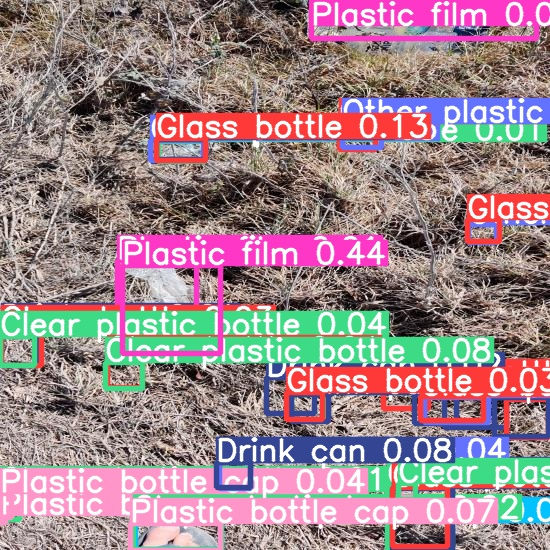

In [9]:
Image('/content/yolov5/runs/detect/exp/000008_jpg.rf.39105ce5a438b0c8c38f89bfd7db7f71.jpg')

In [11]:
!python /content/yolov5/detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.3 --source /content/쓰레기.mp4

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/쓰레기.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-42-g5545ff3 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 322 layers, 86563696 parameters, 0 gradients, 205.0 GFLOPs
video 1/1 (1/124) /content/쓰레기.mp4: 384x640 1 Clear plastic bottle, 61.9ms
video 1/1 (2/124) /content/쓰레기.mp4: 384x640 1 Clear plastic bottle, 52.9ms
video 1/1 (3/124) /content/쓰레기.mp4: 384x640 1 Clear plastic bottle, 35.9ms
video 1/1 (4/124) /content/쓰레기.mp4: 384x640 (no detections), 34.8ms
video 1/1 (5/124) /content/쓰레기.mp4: 384x

In [ ]:
# Detect
from IPython.display import Image

!python /content/yolov5/detect.py --weights /content/yolov5/runs/train/result_jetbot2/weights/best.pt --img 300 --conf 0.5 --source /content/yolov5/runs/detect/exp3/000000_JPG.rf.6c421d17f97533dd996e5ea9772da6f1.jpg

detect: weights=['/content/yolov5/runs/train/result_jetbot2/weights/best.pt'], source=/content/yolov5/runs/detect/exp3/000000_JPG.rf.6c421d17f97533dd996e5ea9772da6f1.jpg, data=yolov5/data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-41-g10e93d2 Python-3.8.16 torch-1.13.1+cu117 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5x summary: 322 layers, 86563696 parameters, 0 gradients, 205.0 GFLOPs
image 1/1 /content/yolov5/runs/detect/exp3/000000_JPG.rf.6c421d17f97533dd996e5ea9772da6f1.jpg: 416x416 (no detections), 48.6ms
Speed: 0.4ms pre-process, 48.6ms inference, 0.4ms NMS per image at shape (1, 3, 416, 416)
Results saved to yolov